In [2]:
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib as plt

In [3]:
accept_raw=pd.read_csv('accepted_2007_to_2018Q4.csv.gz')

C:\Users\Laptop2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

In [5]:
#For Visual inspection for missing values only. Purpose Only, Not for DataProcessing
accept_raw['issue_date'] = pd.to_datetime(accept_raw['issue_d'])
accept_raw['issue_year'] = accept_raw['issue_date'].dt.year
accept_raw['issue_month'] = accept_raw['issue_date'].dt.month


In [6]:
accept_raw.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [65]:
#Subset data to include only 120-rest columns
data=accept_raw.copy().iloc[:,[15]+list(range(119,151))+[152,153]]
data_columns=data.columns.to_list()

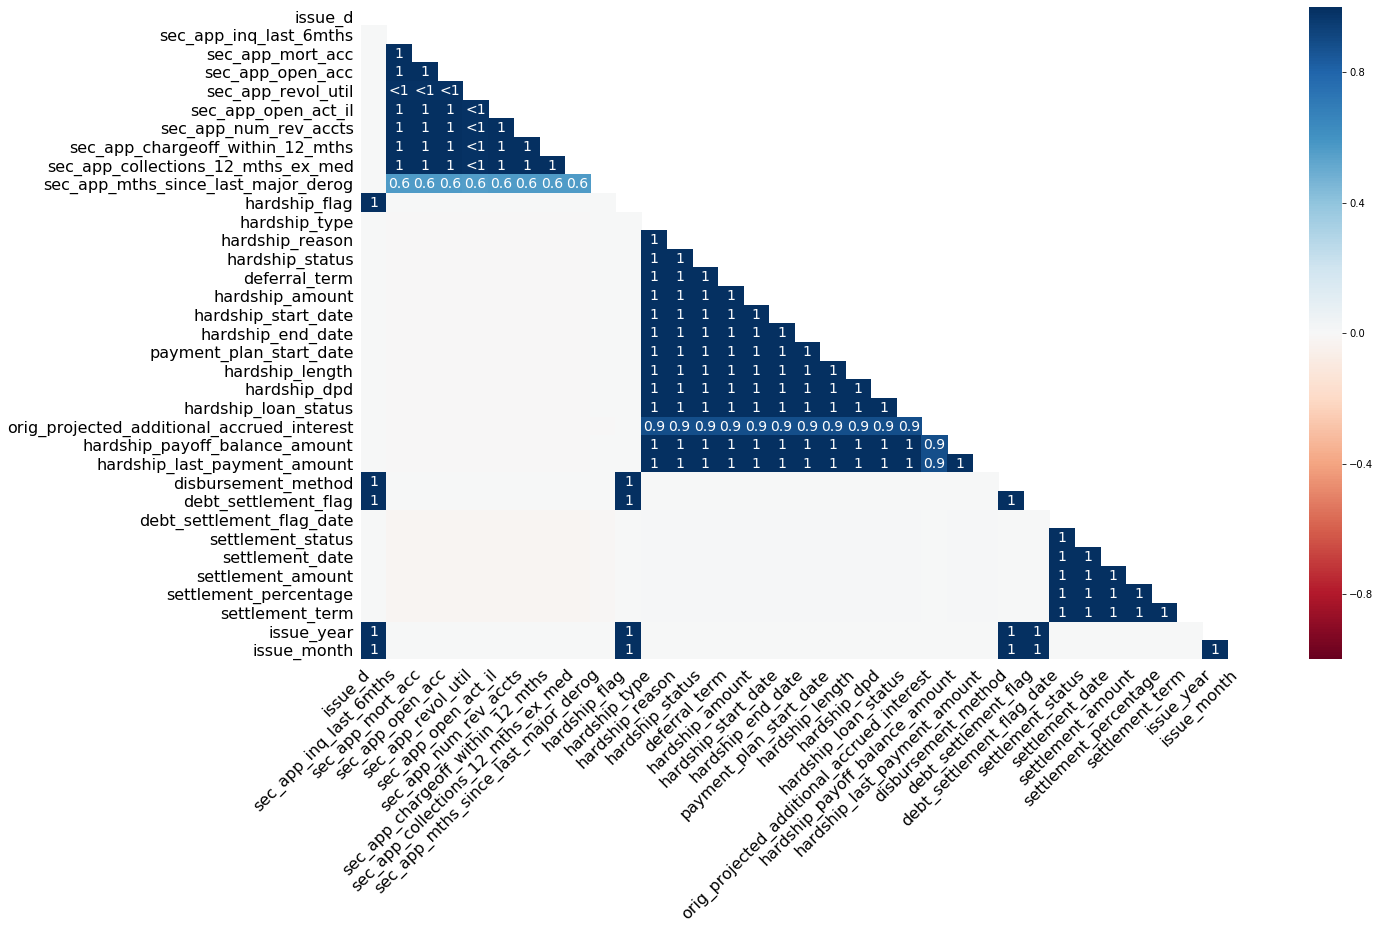

In [66]:
#The missingno correlation heatmap measures nullity correlation: 
#how strongly the presence or absence of one variable affects the presence of another:
import missingno as msno 
msno.heatmap(data)

In [49]:
#Check missing value per year
dict1={}
total_rows=data.shape[0]

list_values=[]
for i in range(2007,2019):
    list_values=None
    list_values=[]
    for column in data_columns:
        missing_each_column=data[data['issue_year']==i][column].isnull().sum()#/total_rows
        list_values.append(missing_each_column)
        dict1[i]=list_values
        

In [50]:
#print table with missing values per year
missing_table=pd.DataFrame.from_dict(dict1)
missing_table['Features']=data_columns
missing_table.set_index('Features')

2007  2008  2009   2010   2011  \
Features                                                                     
issue_d                                        0     0     0      0      0   
sec_app_inq_last_6mths                       603  2393  5281  12537  21721   
sec_app_mort_acc                             603  2393  5281  12537  21721   
sec_app_open_acc                             603  2393  5281  12537  21721   
sec_app_revol_util                           603  2393  5281  12537  21721   
sec_app_open_act_il                          603  2393  5281  12537  21721   
sec_app_num_rev_accts                        603  2393  5281  12537  21721   
sec_app_chargeoff_within_12_mths             603  2393  5281  12537  21721   
sec_app_collections_12_mths_ex_med           603  2393  5281  12537  21721   
sec_app_mths_since_last_major_derog          603  2393  5281  12537  21721   
hardship_flag                                  0     0     0      0      0   
hardship_type                                603  2393  5281  12537  21721   
hardship_reason                              603  2393  5281  12537  21721   
hardship_status                              603  2393  5281  12537  21721   
deferral_term                                603  2393  5281  12537  21721   
hardship_amount                              603  2393  5281  12537  21721   
hardship_start_date                          603  2393  5281  12537  21721   
hardship_end_date                            603  2393  5281  12537  21721   
payment_plan_start_date                      603  2393  5281  12537  21721   
hardship_length                              603  2393  5281  12537  21721   
hardship_dpd                                 603  2393  5281  12537  21721   
hardship_loan_status                         603  2393  5281  12537  21721   
orig_projected_additional_accrued_interest   603  2393  5281  12537  21721   
hardship_payoff_balance_amount               603  2393  5281  12537  21721   
hardship_last_payment_amount                 603  2393  5281  12537  21721   
disbursement_method                            0     0     0      0      0   
debt_settlement_flag                           0     0     0      0      0   
debt_settlement_flag_date                    602  2388  5269  12490  21626   
settlement_status                            602  2388  5269  12490  21626   
settlement_date                              602  2388  5269  12490  21626   
settlement_amount                            602  2388  5269  12490  21626   
settlement_percentage                        602  2388  5269  12490  21626   
settlement_term                              602  2388  5269  12490  21626   
issue_year                                     0     0     0      0      0   
issue_month                                    0     0     0      0      0   

                                             2012    2013    2014    2015  \
Features                                                                    
issue_d                                         0       0       0       0   
sec_app_inq_last_6mths                      53367  134814  235629  421095   
sec_app_mort_acc                            53367  134814  235629  421095   
sec_app_open_acc                            53367  134814  235629  421095   
sec_app_revol_util                          53367  134814  235629  421095   
sec_app_open_act_il                         53367  134814  235629  421095   
sec_app_num_rev_accts                       53367  134814  235629  421095   
sec_app_chargeoff_within_12_mths            53367  134814  235629  421095   
sec_app_collections_12_mths_ex_med          53367  134814  235629  421095   
sec_app_mths_since_last_major_derog         53367  134814  235629  421095   
hardship_flag                                   0       0       0       0   
hardship_type                               53362  134739  235126  418515   
hardship_reason                             53362  134739  235126  418515   
ha

In [67]:
#show unique values for columns
for col in data_columns:
    print ('column', col)
    print('unique values:',data[col].unique())

column issue_d
unique values: ['Dec-2015' 'Nov-2015' 'Oct-2015' 'Sep-2015' 'Aug-2015' 'Jul-2015'
 'Jun-2015' 'May-2015' 'Apr-2015' 'Mar-2015' 'Feb-2015' 'Jan-2015' nan
 'Mar-2018' 'Feb-2018' 'Jan-2018' 'Sep-2017' 'Aug-2017' 'Jul-2017'
 'Jun-2016' 'May-2016' 'Apr-2016' 'Sep-2018' 'Aug-2018' 'Jul-2018'
 'Jun-2017' 'May-2017' 'Apr-2017' 'Mar-2016' 'Feb-2016' 'Jan-2016'
 'Dec-2014' 'Nov-2014' 'Oct-2014' 'Sep-2014' 'Aug-2014' 'Jul-2014'
 'Jun-2014' 'May-2014' 'Apr-2014' 'Mar-2014' 'Feb-2014' 'Jan-2014'
 'Dec-2018' 'Nov-2018' 'Oct-2018' 'Jun-2018' 'May-2018' 'Apr-2018'
 'Dec-2011' 'Nov-2011' 'Oct-2011' 'Sep-2011' 'Aug-2011' 'Jul-2011'
 'Jun-2011' 'May-2011' 'Apr-2011' 'Mar-2011' 'Feb-2011' 'Jan-2011'
 'Dec-2010' 'Nov-2010' 'Oct-2010' 'Sep-2010' 'Aug-2010' 'Jul-2010'
 'Jun-2010' 'May-2010' 'Apr-2010' 'Mar-2010' 'Feb-2010' 'Jan-2010'
 'Dec-2009' 'Nov-2009' 'Oct-2009' 'Sep-2009' 'Aug-2009' 'Jul-2009'
 'Jun-2009' 'May-2009' 'Apr-2009' 'Mar-2009' 'Feb-2009' 'Jan-2009'
 'Dec-2008' 'Nov-2008' 'Oct-

unique values: [ nan   1.  10.  12.  16.  18.   8.   6.  24.  23.   3.   4.   2.  14.
  20.  15.  19.   7.  11.  22.   0.  17.   9.  13.  36.   5.  21.  65.
  27.  26.  30.  28.  32.  60.  25. 112.  50. 118.  33. 181.  45.]
column issue_year
unique values: [2015.   nan 2018. 2017. 2016. 2014. 2011. 2010. 2009. 2008. 2007. 2013.
 2012.]
column issue_month
unique values: [12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1. nan]


In [80]:
def data_processing(data, one_hot_encoder=False, Label_encoder=False):
    
    import numpy as np
    from sklearn.preprocessing import LabelEncoder
    
    
    
    data=data.copy()
    
    #Drop rows with missing information
    row_to_drop=data[data.issue_d.isna()].index.tolist()
    data=data.drop(data.index[row_to_drop])
    
    
    #Drop issue_d because it is a date. It is not in the column of 120 and after
    data=data.drop(["issue_d"],axis=1)
    
    #IMPUTE MISSING VALUES
    #for the secondary applicant group, nan is for no secondary applicant. 
    #sec_: numerical columns, -999 is used to distinguish data
    data.sec_app_inq_last_6mths=data.sec_app_inq_last_6mths.fillna(-999)
    data.sec_app_mort_acc=data.sec_app_mort_acc.fillna(-999)
    data.sec_app_open_acc=data.sec_app_open_acc.fillna(-999)
    data.sec_app_revol_util=data.sec_app_revol_util.fillna(-999)
    data.sec_app_open_act_il=data.sec_app_open_act_il.fillna(-999)
    data.sec_app_num_rev_accts=data.sec_app_num_rev_accts.fillna(-999)
    data.sec_app_chargeoff_within_12_mths=data.sec_app_chargeoff_within_12_mths.fillna(-999)
    data.sec_app_collections_12_mths_ex_med=data.sec_app_collections_12_mths_ex_med.fillna(-999)
    data.sec_app_mths_since_last_major_derog=data.sec_app_mths_since_last_major_derog.fillna(-999)
    

    
####!!!NOTE: HARDSHIP AND SETTLEMENTS ARE AFTER LOAN IS ISSUED!!!!
    #Candidate for drop: hardship_flag
    #hardship_flag: Y, N, nan (unique value)
        #observation for N: no hardship (hardship related column is nan) or hardship status is not active (but hardship related columns are filled).
        #observvation for Y: hardship status is active, and all hardship related columns are filled

        
    #fill na but candidate for drop:hardship_type. Only 2 unique category.
    #hardship_type: nan, 'INTEREST ONLY-3 MONTHS DEFERRAL' (unique values)
    data.hardship_type=data.hardship_type.fillna('NA-noHardShip')
    
    #Fill NA when there is no hardship. 
    data.hardship_reason=data.hardship_reason.fillna('NA-noHardShip')
    data.hardship_status=data.hardship_status.fillna('NA-noHardShip')
                              
    #fill na but candidate for drop: Deferall term, only 2 unique category. 
    #deferral_term: nan, 3, (unique values). 
    data.deferral_term=data.deferral_term.fillna(-999)
        
    #Fill -999 when there is no hardship. 
    data.hardship_amount=data.hardship_amount.fillna(-999)
    
    #length_of_hardship_payment:hardship_end_date-payment_plan_start_date
    data.hardship_end_date=data.hardship_end_date.fillna(0)
    data.payment_plan_start_date=data.payment_plan_start_date.fillna(0)
    data.hardship_end_date=pd.to_datetime(data.hardship_end_date)
    data.payment_plan_start_date=pd.to_datetime(data.payment_plan_start_date)
    
    data['length_of_hardship_payment']=(data.hardship_end_date-data.payment_plan_start_date)/np.timedelta64(1, 'M')
    data['length_of_hardship_payment']=data['length_of_hardship_payment'].astype(int)
    
    #Drop dates after imputation
    data=data.drop(['hardship_end_date',"payment_plan_start_date"], axis=1)

    
    #Drop hardship_start_date, hardship_end_date because hardship_length can represent the duration
    data=data.drop(['hardship_start_date'], axis=1)
    #data=data.drop(['hardship_end_date'],axis=1)  #dropped previously
    

    #fill -999 if no hardship
    data.hardship_length=data.hardship_length.fillna(-999)


    #Fill -999 when there is no hardship.  
    data.hardship_dpd=data.hardship_dpd.fillna(-999)

    #Fill na when no hardship
    data.hardship_loan_status=data.hardship_loan_status.fillna('None')
    
    #by definition, this orig_projected_additional_accrued_interest will be null if hardship_status is 'BROKEN'
    data.orig_projected_additional_accrued_interest=data.orig_projected_additional_accrued_interest.fillna(-999)

    #fill -999 with no hardship
    data.hardship_payoff_balance_amount=data.hardship_payoff_balance_amount.fillna(-999)
    data.hardship_last_payment_amount=data.hardship_last_payment_amount.fillna(-999) 
    
    
####NOTE: SETTLEMENT IS AFTER THE LOAN IS ISSUE
    #Fill na with no settlement involved
    data.settlement_status=data.settlement_status.fillna('None')
    #Fill -999 with no settlement involved
    data.settlement_amount=data.settlement_amount.fillna(-999)
    data.settlement_percentage=data.settlement_amount.fillna(-999)
    data.settlement_term=data.settlement_term.fillna(-999)

    #Combine debt_settlement_flag_date with settlement_date
    data.debt_settlement_flag_date=data.debt_settlement_flag_date.fillna(0)
    data.settlement_date=data.settlement_date.fillna(0)
    data.debt_settlement_flag_date=pd.to_datetime(data.debt_settlement_flag_date)
    data.settlement_date=pd.to_datetime(data.settlement_date)
    
    data['duration_settlement_debt_se_flag']=(data.debt_settlement_flag_date-data.settlement_date)/np.timedelta64(1, 'M')
    data['duration_settlement_debt_se_flag']=data['duration_settlement_debt_se_flag'].astype(int)
    
    #Drop date after imputation
    data=data.drop(['debt_settlement_flag_date',"settlement_date"], axis=1)


    categorical_columns=['hardship_flag','hardship_type','hardship_reason',"hardship_status",
                        "hardship_loan_status","disbursement_method","debt_settlement_flag",
                        "settlement_status"]
    if one_hot_encoder:
        data = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns, drop_first=True)
    
    
    #get label encoder. categorical data change to numerical values
    if Label_encoder:
        le = LabelEncoder()
        categorical_ordinal_col=data.select_dtypes(include=['object']).columns.to_list()
        data[categorical_ordinal_col]=data[categorical_ordinal_col].apply(lambda col: le.fit_transform(col))
    
    
    

    return (data)

In [81]:
data_processing(data, one_hot_encoder=False, Label_encoder=True)

sec_app_inq_last_6mths  sec_app_mort_acc  sec_app_open_acc  \
0                        -999.0            -999.0            -999.0   
1                        -999.0            -999.0            -999.0   
2                        -999.0            -999.0            -999.0   
3                        -999.0            -999.0            -999.0   
4                        -999.0            -999.0            -999.0   
5                        -999.0            -999.0            -999.0   
6                        -999.0            -999.0            -999.0   
7                        -999.0            -999.0            -999.0   
8                        -999.0            -999.0            -999.0   
9                        -999.0            -999.0            -999.0   
10                       -999.0            -999.0            -999.0   
11                       -999.0            -999.0            -999.0   
12                       -999.0            -999.0            -999.0   
13                       -999.0            -999.0            -999.0   
14                       -999.0            -999.0            -999.0   
15                       -999.0            -999.0            -999.0   
16                       -999.0            -999.0            -999.0   
17                       -999.0            -999.0            -999.0   
18                       -999.0            -999.0            -999.0   
19                       -999.0            -999.0            -999.0   
20                       -999.0            -999.0            -999.0   
21                       -999.0            -999.0            -999.0   
22                       -999.0            -999.0            -999.0   
23                       -999.0            -999.0            -999.0   
24                       -999.0            -999.0            -999.0   
25                       -999.0            -999.0            -999.0   
26                       -999.0            -999.0            -999.0   
27                       -999.0            -999.0            -999.0   
28                       -999.0            -999.0            -999.0   
29                       -999.0            -999.0            -999.0   
30                       -999.0            -999.0            -999.0   
31                       -999.0            -999.0            -999.0   
32                       -999.0            -999.0            -999.0   
33                       -999.0            -999.0            -999.0   
34                       -999.0            -999.0            -999.0   
35                       -999.0            -999.0            -999.0   
36                       -999.0            -999.0            -999.0   
37                       -999.0            -999.0            -999.0   
38                       -999.0            -999.0            -999.0   
39                       -999.0            -999.0            -999.0   
40                       -999.0            -999.0            -999.0   
41                       -999.0            -999.0            -999.0   
42                       -999.0            -999.0            -999.0   
43                       -999.0            -999.0            -999.0   
44                       -999.0            -999.0            -999.0   
45                       -999.0            -999.0            -999.0   
46                       -999.0            -999.0            -999.0   
47                       -999.0            -999.0            -999.0   
48                       -999.0            -999.0            -999.0   
49                       -999.0            -999.0            -999.0   
50                       -999.0            -999.0            -999.0   
51                       -999.0            -999.0            -999.0   
52                       -999.0            -999.0            -999.0   
53                       -999.0            -999.0            -999.0   
54                       -999.0            -999.0            -999.0   
55                       -999.0  